In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
tickerSymbol = 'qqq'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='max')


# Calculate 50-day and 200-day moving averages
tickerDf['SMA_50'] = tickerDf['Close'].rolling(window=50).mean()
tickerDf['SMA_200'] = tickerDf['Close'].rolling(window=200).mean()

# Calculate 12-day and 26-day exponential moving averages for MACD
tickerDf['EMA_12'] = tickerDf['Close'].ewm(span=12, adjust=False).mean()
tickerDf['EMA_26'] = tickerDf['Close'].ewm(span=26, adjust=False).mean()



# Plot MACD
tickerDf['MACD'] = tickerDf['EMA_12'] - tickerDf['EMA_26']



In [ ]:
tickerDf['PriceChange'] = tickerDf['Close'].diff()

# Calculate daily gains and losses
tickerDf['Gain'] = np.where(tickerDf['PriceChange'] > 0, tickerDf['PriceChange'], 0)
tickerDf['Loss'] = np.where(tickerDf['PriceChange'] < 0, abs(tickerDf['PriceChange']), 0)

# Calculate average gains and losses over the desired window (usually 14 days)
window = 14
tickerDf['AvgGain'] = tickerDf['Gain'].rolling(window=window).mean()
tickerDf['AvgLoss'] = tickerDf['Loss'].rolling(window=window).mean()

# Calculate relative strength (RS)
tickerDf['RS'] = tickerDf['AvgGain'] / tickerDf['AvgLoss']

# Calculate RSI
tickerDf['RSI'] = 100 - (100 / (1 + tickerDf['RS']))

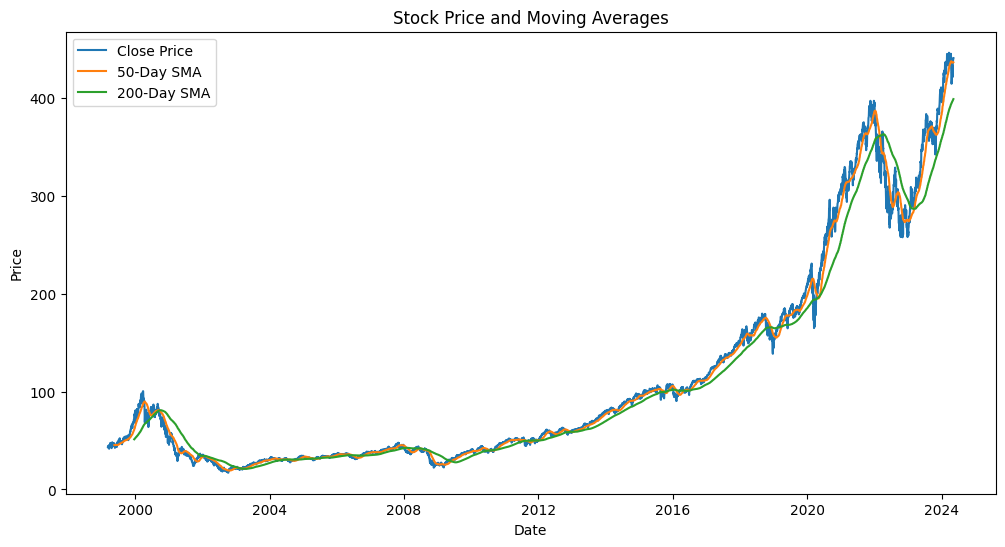

In [4]:
plt.figure(figsize=(12,6))
plt.plot(tickerDf['Close'], label='Close Price')
plt.plot(tickerDf['SMA_50'], label='50-Day SMA')
plt.plot(tickerDf['SMA_200'], label='200-Day SMA')
plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [5]:
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,SMA_50,SMA_200,EMA_12,EMA_26,MACD
Date,,,,,,,,,,,,,
1999-03-10 00:00:00-05:00,43.600684,43.627335,42.881113,43.547382,5232000,0.0,0.0,0.0,NaN,NaN,43.547382,43.547382,0.000000
1999-03-11 00:00:00-05:00,43.867208,44.120391,42.907779,43.760605,9688600,0.0,0.0,0.0,NaN,NaN,43.580186,43.563177,0.017009
1999-03-12 00:00:00-05:00,43.600696,43.627346,42.348108,42.694569,8743600,0.0,0.0,0.0,NaN,NaN,43.443937,43.498835,-0.054898
1999-03-15 00:00:00-05:00,43.014394,43.973822,42.561330,43.920521,6369000,0.0,0.0,0.0,NaN,NaN,43.517258,43.530071,-0.012814
1999-03-16 00:00:00-05:00,44.107081,44.480192,43.627366,44.293636,4905800,0.0,0.0,0.0,NaN,NaN,43.636700,43.586632,0.050069
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-03 00:00:00-04:00,434.440002,436.480011,432.619995,435.480011,48515300,0.0,0.0,0.0,436.203373,397.664294,428.469340,430.874826,-2.405486
2024-05-06 00:00:00-04:00,437.299988,440.339996,436.519989,440.250000,30227200,0.0,0.0,0.0,436.284308,397.991682,430.281749,431.569283,-1.287534
2024-05-07 00:00:00-04:00,440.700012,441.970001,439.579987,440.320007,30996100,0.0,0.0,0.0,436.371238,398.325039,431.826096,432.217485,-0.391389


In [9]:
print((tickerDf['Close'] > tickerDf['SMA_50']).sum())
print((tickerDf['Close'] > tickerDf['SMA_200']).sum())

4076
4438
